<a href="https://colab.research.google.com/github/KhantPhyo/Machine-Learning-with-Python---Scikit-Learn/blob/main/SK6_sklearn_clustering_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.cluster import KMeans

#from sklearn.datasets import make_regression
from sklearn.datasets import load_digits, make_classification

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [12]:
digits = load_digits()
#X, y = make_classification(n_features = 4, random_state = 0)
digits.images[0] #flattened data for single images of the dataset

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

we can visually check the contents of this result using the matplotlib library.

- Import pyplot module which is under matplotlib as plt.
- The imshow() function is used to display data as an image; i.e. on a 2D regular raster.
- cmap = gray_r displays a grayscale image.
- interpolation= ‘nearest’ displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution.
- The title() function is used to display the title on the graph.

Text(0.5, 1.0, 'Visualizing an array')

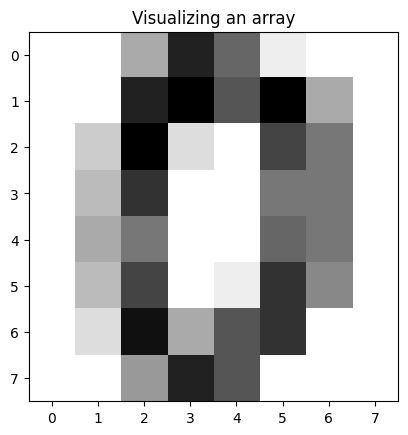

In [13]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.title('Visualizing an array')

In [17]:
#10 Cluster
k_means = KMeans(n_clusters=10, n_init=10, random_state=0)
clusters = k_means.fit_predict(digits.data) #run KMeans clustering on digits.data for 1797 records and 64 features
k_means.cluster_centers_.shape

(10, 64)

# Visualization of the 10 digits
Using the NumPy and matplotlib libraries, we can display each digit from 0 to 9 which are in the form of an array as images.

- The figure() function in the pyplot module of the matplotlib library is used to create a new figure with a specified size of (15,4).
- subplots_adjust(hspace=0.8) is used to adjust the space between the rows of the subplots.
- Combine two lists using the zip() function for easier handling inside the plotting loop.
- enumerate() method adds a counter to an iterable and returns it. The returned object is a enumerate object.
- subplot() function is used to add a subplot to a current figure at the specified grid position.

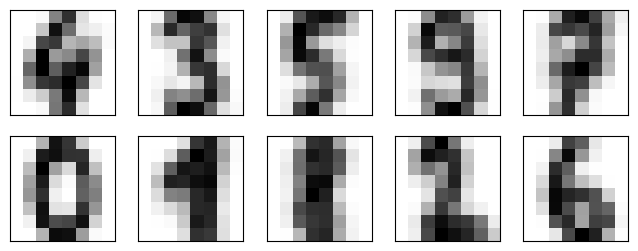

In [18]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = k_means.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image & plotting relevant centers
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) #imshow(matplotlib method) to render the image in notebook

There are 10 clusters

- Cluster 1 is a cluster of datapoints that look like digit 4
- Cluster 4 is a cluster of datapoints that look like digit 9
- Cluster 10 is a cluster of datapoints that look like digit 6
- Cluster 8 looks little distorted and seems like Digit 8 like datapoints may have been misclustered

In [19]:
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
    mask = (clusters == i)
    #if a specific digit belongs to/equivalent a specific cluster then its True else False
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


In [20]:
#if a specific digit belongs to/equivalent a specific cluster then acuracy is 1 else 0
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 79.35%


#Easy Way

In [22]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(X_train)

# Use KMeans to predict cluster labels for test data
cluster_labels = kmeans.predict(X_test)

# Map cluster labels to the most common true digit label within each cluster
cluster_to_digit = {}
for cluster in range(10):
    mask = (cluster_labels == cluster)
    most_common_digit = np.bincount(y_test[mask]).argmax()
    cluster_to_digit[cluster] = most_common_digit
predicted_digits = np.vectorize(cluster_to_digit.get)(cluster_labels)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, predicted_digits)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.79


cluster_to_digit = {}
- Here, we initialize an empty dictionary called cluster_to_digit. This dictionary will be used to map cluster labels to the most common true digit label within each cluster.

for cluster in range(10):
- This is a loop that iterates over 10 clusters. In the context of the digits dataset, KMeans clustering is used to partition the data into 10 clusters (since there are 10 digits, 0-9).

mask = (cluster_labels == cluster)
- Inside the loop, we create a boolean mask using the cluster_labels. The cluster_labels contain the cluster assignments for each data point in the test set. This mask will be True for data points that belong to the current cluster and False for others.

most_common_digit = np.bincount(y_test[mask]).argmax()
- We calculate the most common true digit label within the current cluster. np.bincount(y_test[mask]) counts the occurrences of each digit label (y_test) that belong to the current cluster, and argmax() returns the label with the highest count. So, most_common_digit will hold the digit label that appears most frequently in the current cluster.

cluster_to_digit[cluster] = most_common_digit
- We store the mapping between the cluster label (cluster) and the most common true digit label (most_common_digit) in the cluster_to_digit dictionary. This dictionary will help us convert cluster labels to digit labels later.

predicted_digits = np.vectorize(cluster_to_digit.get)(cluster_labels)
- Finally, we use np.vectorize() to apply the mapping function cluster_to_digit.get to each element of cluster_labels. This step converts the cluster labels predicted by KMeans into their corresponding digit labels based on the most common true digit label within each cluster.